In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
cities = pd.read_csv("cities.csv")
cities

,Latitude,Longitude
0,0.685641,0.941492
1,0.084068,0.324984
2,0.870655,0.984979
3,0.418170,0.892779
4,0.683832,0.866530
5,0.582265,0.657228
6,0.915066,0.120116
7,0.348353,0.615207
8,0.062785,0.628634
9,0.431188,0.911738


In [3]:
cities = np.array(cities)
cities

array([[0.68564117, 0.94149231],
       [0.08406784, 0.32498417],
       [0.87065468, 0.98497868],
       [0.41816963, 0.89277934],
       [0.68383232, 0.86653025],
       [0.58226548, 0.65722797],
       [0.91506608, 0.1201162 ],
       [0.34835276, 0.61520676],
       [0.06278476, 0.62863416],
       [0.43118833, 0.91173837],
       [0.48746043, 0.72555095],
       [0.44471039, 0.34786596]])

Text(0, 0.5, 'Longitude')

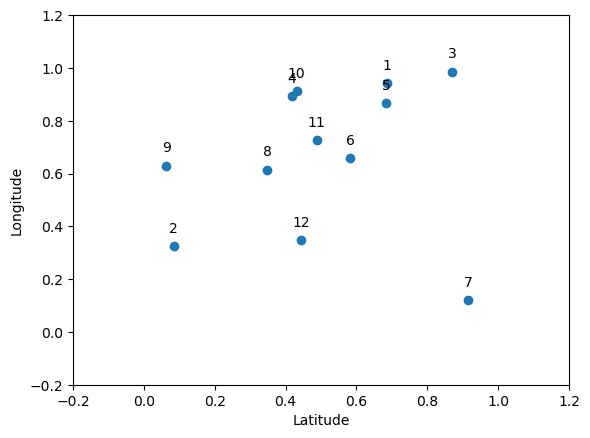

In [4]:
plt.scatter(cities[:,0], cities[:,1])
for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
    plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [5]:
# Calculate the distance matrix between cities
def calculate_distance_matrix(cities):
    num_cities = len(cities)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            distance_matrix[i, j] = np.linalg.norm(cities[i] - cities[j])
    return distance_matrix

In [6]:
distance_matrix = calculate_distance_matrix(cities)
distance_matrix

array([[0.        , 0.86137841, 0.19005542, 0.27187125, 0.07498388,
        0.30247769, 0.85281563, 0.46928214, 0.6970153 , 0.25618654,
        0.29309772, 0.64065582],
       [0.86137841, 0.        , 1.02679677, 0.65879843, 0.80807771,
        0.5988212 , 0.85587905, 0.39252474, 0.30439496, 0.68174272,
        0.56848864, 0.36136772],
       [0.19005542, 1.02679677, 0.        , 0.46178289, 0.2212072 ,
        0.43656484, 0.866002  , 0.63994575, 0.88296955, 0.44552757,
        0.46275326, 0.76638185],
       [0.27187125, 0.65879843, 0.46178289, 0.        , 0.26695632,
        0.28707473, 0.91864814, 0.28621833, 0.44279915, 0.02299851,
        0.18101533, 0.54555935],
       [0.07498388, 0.80807771, 0.2212072 , 0.26695632, 0.        ,
        0.23264408, 0.78141089, 0.4191778 , 0.66505234, 0.25665689,
        0.24173762, 0.57113215],
       [0.30247769, 0.5988212 , 0.43656484, 0.28707473, 0.23264408,
        0.        , 0.6318586 , 0.23765719, 0.52026707, 0.29597272,
        0.116859  ,

Text(0, 0.5, 'Longitude')

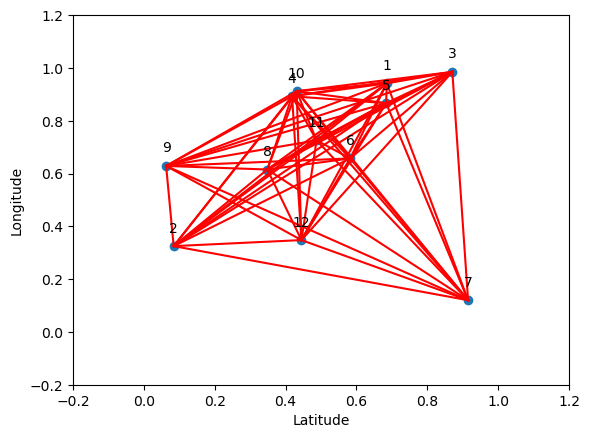

In [7]:
plt.scatter(cities[:,0], cities[:,1])
for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
    plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        plt.plot([cities[i,0], cities[j,0]], [cities[i,1], cities[j,1]], color='red')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("Latitude")
plt.ylabel("Longitude")

In [8]:
origin_city = 6
destination_city = 9

In [9]:
def plot_origin_desitination(cities, origin_city, destination_city):
    plt.scatter(cities[:,0], cities[:,1])
    for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
        plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
    if origin_city != destination_city:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
        plt.scatter(cities[destination_city-1,0], cities[destination_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Destination", (cities[destination_city-1,0], cities[destination_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin/Destination", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

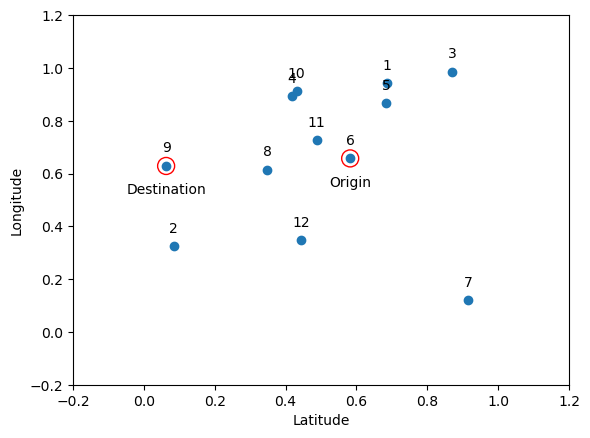

In [10]:
plot_origin_desitination(cities, origin_city, destination_city)

In [11]:
# Calculate total distance of a path
def calculate_total_distance(path, distance_matrix):
    total_distance = np.sum([distance_matrix[path[i]-1,path[i+1]-1] for i in range(len(path)-1)])
    return total_distance

In [12]:
# Simulated annealing
def simulated_annealing(cities, origin_city, destination_city, initial_temperature, cooling_rate, num_iterations):
    num_cities = len(cities)
    if origin_city != destination_city:
        current_path = np.zeros(num_cities, dtype=int)
        current_path[0] = origin_city
        current_path[-1] = destination_city
        rest_cities = list(range(1,num_cities+1))
        rest_cities.remove(origin_city)
        rest_cities.remove(destination_city)
        current_path[1:-1] = np.random.permutation(rest_cities)
    else:
        current_path = np.zeros(num_cities+1, dtype=int)
        current_path[0] = origin_city
        current_path[-1] = destination_city
        rest_cities = list(range(1,num_cities+1))
        rest_cities.remove(origin_city)
        current_path[1:-1] = np.random.permutation(rest_cities)

    distance_matrix = calculate_distance_matrix(cities)
    current_distance = calculate_total_distance(current_path, distance_matrix)
    
    best_path = current_path.copy()
    best_distance = current_distance
    current_distances = []
    
    for iteration in range(num_iterations):
        temperature = initial_temperature * np.exp(-cooling_rate * iteration)
        
        new_path = current_path.copy()
        i, j = random.sample(range(1, len(current_path)-1), 2)
        new_path[i], new_path[j] = new_path[j], new_path[i]
        new_distance = calculate_total_distance(new_path, distance_matrix)
        
        if new_distance < current_distance:
            current_path = new_path
            current_distance = new_distance
            if new_distance < best_distance:
                best_path = new_path
                best_distance = new_distance
        else:
            probability = np.exp(-(new_distance - current_distance) / temperature)
            if random.random() < probability:
                current_path = new_path
                current_distance = new_distance
                
        current_distances.append(current_distance)
    
    return best_path, best_distance, current_distances

In [13]:
# Set parameters for simulated annealing
initial_temperature = 1000
cooling_rate = 0.0002
num_iterations = 100000

best_path, best_distance, current_distances = simulated_annealing(cities, origin_city, destination_city, initial_temperature, cooling_rate, num_iterations)

Text(0, 0.5, 'Distance')

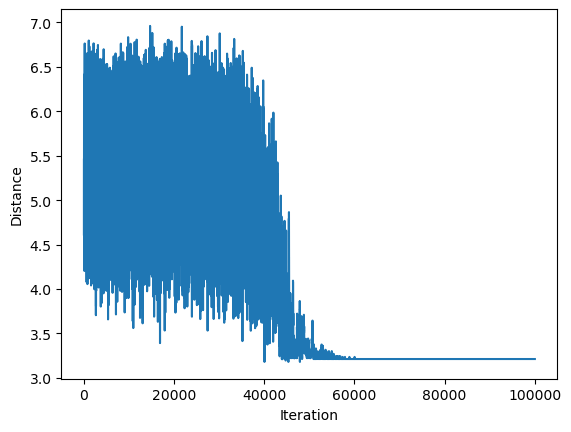

In [14]:
plt.plot(range(num_iterations), current_distances)
plt.xlabel("Iteration")
plt.ylabel("Distance")

In [15]:
# Print the results
print("Best path:", best_path)
print("Shortest path length:", best_distance)

Best path: [ 6 11  8  4 10  5  1  3  7 12  2  9]
Shortest path length: 3.179688491154706


In [16]:
# Plot the best path
def plot_best_path(cities, origin_city, destination_city, best_path):
    plt.scatter(cities[:,0], cities[:,1])
    for i, (x_val, y_val) in enumerate(zip(cities[:,0], cities[:,1])):
        plt.annotate(str(i+1), (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center')
    if origin_city != destination_city:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
        plt.scatter(cities[destination_city-1,0], cities[destination_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Destination", (cities[destination_city-1,0], cities[destination_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    else:
        plt.scatter(cities[origin_city-1,0], cities[origin_city-1,1], s=150, facecolors='none', edgecolors='r')
        plt.annotate("Origin/Destination", (cities[origin_city-1,0], cities[origin_city-1,1]), textcoords="offset points", xytext=(0,-20), ha='center')
    for i in range(len(best_path)-1):
        plt.plot([cities[best_path[i]-1,0], cities[best_path[i+1]-1,0]], [cities[best_path[i]-1,1], cities[best_path[i+1]-1,1]], color='r')
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")

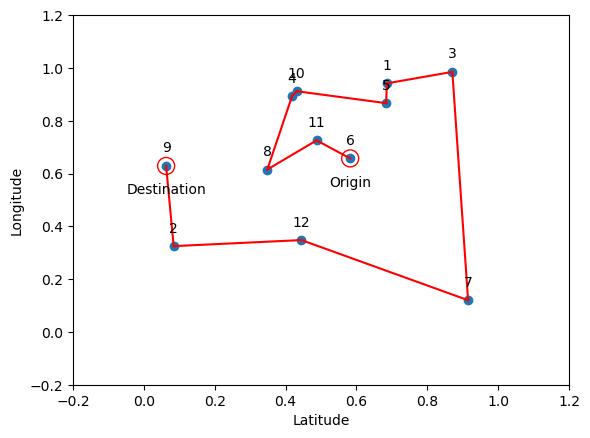

In [17]:
plot_best_path(cities, origin_city, destination_city, best_path)

In [18]:
temperatures = []
for iteration in range(num_iterations):
    temperature = initial_temperature * np.exp(-cooling_rate * iteration)
    temperatures.append(temperature)

Text(0, 0.5, 'Temperature')

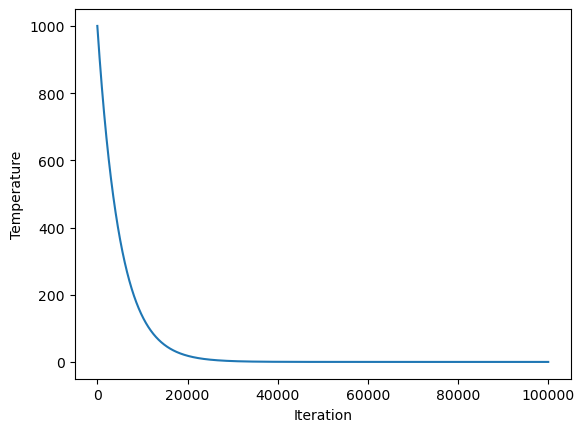

In [19]:
plt.plot(range(num_iterations), temperatures)
plt.xlabel("Iteration")
plt.ylabel("Temperature")

In [20]:
probabilities = []
new_distance = 2.1
current_distance = 2
for temperature in temperatures:
    probability = np.exp(-(new_distance - current_distance) / temperature)
    probabilities.append(probability)

Text(0, 0.5, 'Probability')

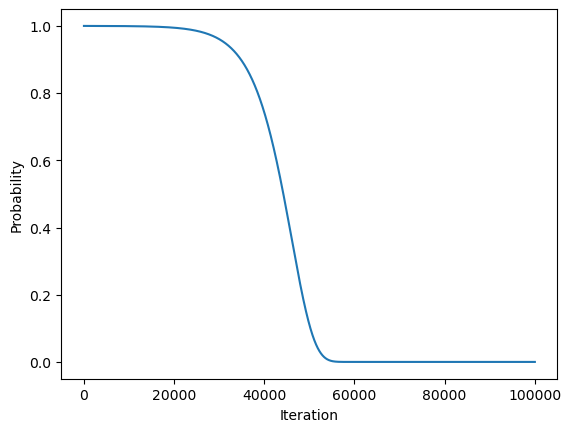

In [21]:
plt.plot(range(num_iterations), probabilities)
plt.xlabel("Iteration")
plt.ylabel("Probability")